# **Santander Customer Satisfaction**

Shivani Shekhawat (002656554)


We will be using the data provided by Santander Bank for this project. The bank has made available data gathered throughout the course of the customer journey and the related end-of-journey result of customer satisfaction. The fact that the bank has anonymized the features offered, makes feature interpretation a significant challenge. However, finding the high impact predictors that will be very useful to the Santander Bank is still conceivable.

## Abstract

This project uses Santander Bank's dataset to forecast the chance that each test set client is dissatisfied. With the data, a supervised learning classification model can anticipate customer unhappiness. Evaluate the viability of numerous customer satisfaction prediction measures. Using model interpretation, we find consumer satisfaction variables. Identify possible areas for improvement and model implementation. We start with performing routine Data cleanup & EDA, followed by PCA (Principal Component Analysis) to reduce the dimensionality of the data and help in training data faster. Further, we check for class imbalances (As we are working with customer satisfaction data, we expect there to be a natural imbalance). We use Logistic Regression, Random Forest classifier, and XGBoost as base models, while also tuning their hyperparameters, creating an ensemble model combining the base models, and checking the cumulative accuracy of the model. After establishing the best model, we use permutation importance to determine the predictors with the influence on model performance. We use SHAP analysis. SHAP values for each feature represent the change in the expected model prediction when conditioning on that feature.  

## About Dataset

The dataset was taken from Kaggle, where Santander bank had given it as part of a competition. It consists of two files: 'train.csv' and 'test.csv', containing 371 and 370 features, respectively. There are 76020 rows in training data and 75817 rows in test data. Each row in the dataset represents a customer. The 'train.csv' file contains an additional column called 'TARGET', which indicates the customer's satisfaction level. The columns are anonymized, so the column names in the dataset do not provide any meaningful information about the features, possibly for security or privacy reasons. The data is heavily imbalanced, with only 3.957% of the customers belonging to the unsatisfied class ('1').

## **Importing Libraries**

In [ ]:
!pip install imbalanced-learn

You should consider upgrading via the 'C:\Users\adhar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
#ls import shuffle
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import time

from sklearn.inspection import permutation_importance

from scipy import stats

# from prettytable import PrettyTable

from collections import Counter

import warnings

warnings.filterwarnings("ignore")

sns.set()

### **Loading Dataset**

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 56B8-A16D

 Directory of C:\Users\adhar\Music\Shivani DS

12/17/2022  10:36 PM    <DIR>          .
12/17/2022  10:36 PM    <DIR>          ..
12/16/2022  05:56 PM    <DIR>          .ipynb_checkpoints
12/16/2022  04:58 PM    <DIR>          content
12/17/2022  10:36 PM         2,794,579 DS_final_project (1).ipynb
12/16/2022  05:56 PM           948,850 DS_final_project (1)-Copy1.ipynb
12/17/2022  12:20 PM            25,613 target_counts.png
               3 File(s)      3,769,042 bytes
               4 Dir(s)  382,401,957,888 bytes free


In [ ]:
#reading train and test data into respective dataframes
#df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [ ]:
# df_train = "/content/train.csv"
df_train = pd.read_csv("content/train.csv")
# df_test = "/content/test.csv"
df_test=pd.read_csv("content/test.csv")

### **Dataset Details**

In [ ]:
df_train.shape

(76020, 371)

In [ ]:
pd.options.display.max_columns = 371
df_train.describe() #gets summary statistics on all our features

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

OBSERVATIONS:

The dataset contains a large number of columns: 371
Binary target class: 0 and 1
Some columns present very large values. For example, var38 contains values of order 107
Ad-hoc values are present in some cases. For example, var3 with -999999 values. This could point in the direction of unkwown encoded categorical variables

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


It is observed that the data set has 76020 rows and 371 columns. This indicates that our dataset has a large number of predictor values.

The target variable is named as "TARGET".

In [ ]:
cols = df_train.columns
list(set([col.split('_')[0] for col in cols]))

['imp',
 'var36',
 'num',
 'var15',
 'ind',
 'var21',
 'TARGET',
 'var3',
 'var38',
 'saldo',
 'ID',
 'delta']

We notice that these 12 value are set as prefixes of different column names. All other columns seem to be variations of these mentioned columns.

In [ ]:
#some columns have "special" tag on front
ind_cols = cols[[col.split('_')[0] == 'ind' for col in cols]]
imp_cols = cols[[col.split('_')[0] == 'imp' for col in cols]]
saldo_cols = cols[[col.split('_')[0] == 'saldo' for col in cols]]
delta_cols = cols[[col.split('_')[0] == 'delta' for col in cols]]
num_cols = cols[[col.split('_')[0] == 'num' for col in cols]]
len(ind_cols), len(imp_cols), len(saldo_cols), len(delta_cols), len(num_cols)

(75, 49, 71, 26, 143)

There are columns with prefixes set - 75, 49, 71, 26, 143

75 columns with 'ind'
49 columsn with 'imp'
71 columns with 'saldo'
26 columns with 'delta'
143 columns with 'num'

In [ ]:
df_train[ind_cols].describe()

,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1
count,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,0.023652,0.005301,0.001802,0.001447,0.000026,0.000026,0.004196,0.003631,0.002697,0.042370,0.037885,0.026427,0.024638,0.027559,0.024638,0.023639,0.023639,0.0,0.0,0.0,0.0,0.000105,0.000026,0.995488,0.732833,0.004275,0.00367,0.001210,0.001079,0.001079,0.000750,0.000631,0.000026,0.000026,0.072297,0.065259,0.065259,0.880755,0.011418,0.003723,0.879282,0.0,0.003723,0.001881,0.001697,0.0,0.0,0.000039,0.002697,0.080873,0.092160,0.096869,0.085912,0.066588,0.129308
std,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,0.151962,0.072617,0.042414,0.038012,0.005129,0.005129,0.064643,0.060146,0.051860,0.201434,0.190919,0.160403,0.155021,0.163705,0.155021,0.151921,0.151921,0.0,0.0,0.0,0.0,0.010258,0.005129,0.067020,0.442483,0.065245,0.06047,0.034767,0.032826,0.032826,0.027372,0.025120,0.005129,0.005129,0.258980,0.246984,0.246984,0.324079,0.106244,0.060901,0.325802,0.0,0.060901,0.043331,0.041159,0.0,0.0,0.006282,0.051860,0.272642,0.289254,0.295782,0.280235,0.249308,0.335543
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

The columns with prefix as 'ind' have special tag with values set as 0 & 1. Their min and max are 0 & 1 only.

In [ ]:
df_train[imp_cols].describe()

,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04
mean,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.0,0.231189,0.0,0.018051,2823.949089,619.585010,9.878877e+01,31.105323,2.985793,0.048145,2.721454,1.276982e+02,13.964581,1.167825e+02,0.0,46.180243,0.158210,12.569401,0.0,0.015785,8.541207e+02,1.932954e+03,1.874808,2.512678,0.0,1.913616,2.789772,0.314701,0.0,0.039463,3.787137,8.143383e+01
std,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.0,57.320958,0.0,4.099461,25334.468106,11252.995089,2.212072e+04,2457.091282,226.862984,6.022692,554.249437,6.368997e+03,1151.510862,1.362044e+04,0.0,2859.736591,43.621319,1093.133883,0.0,4.352285,1.425589e+04,2.535572e+04,388.245022,508.968831,0.0,357.405330,323.814261,53.408085,0.0,10.880712,811.976086,1.128241e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%

The columns with prefix as 'imp' have a huge gap bwetween their minimum and maximum values. the minimum for these columns are 0 but the maximum value are have a huge range. For some they are 0, remaing are ranging between 1000 and 500000.

In [ ]:
df_train[saldo_cols].describe()

,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3
count,7.602000e+04,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.0,76020.0,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,7.602000e+04,76020.000000,76020.0,76020.0,76020.000000,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,4.844911e+01,1028.468235,0.414475,141.226784,6.021616e+03,4993.752970,1.493682e+03,0.513023,6.487948e+03,69.096200,1.834059e+02,4.340963e+01,27.399456,5.925120e+03,76.081633,72.735693,0.0,0.0,0.414475,1.367967e+04,2.922910e+02,3.345941,12.532333,0.670876,36.907194,4.368602,0.0,7.191725e+03,96.352738,0.0,0.0,1579.135311,8.913659e+02,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351
std,1.093747e+04,9852.140073,83.096797,2515.656302,4.814471e+04,32619.134245,2.001649e+04,113.597559,3.841675e+04,2839.618964,2.269813e+04,1.093497e+04,2477.810744,4.800853e+04,739.776626,726.882669,0.0,0.0,83.096797,6.301408e+04,2.331640e+04,126.680152,797.839557,141.448598,472.098863,113.968756,0.0,4.914531e+04,5218.428365,0.0,0.0,12148.452398,9.888597e+03,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182.642532,31886.615189,25572.245055,13082.155867,4698.868075,1.600698e+04,1.242252e+04,34.625518,0.0,113.597559,73.376513,1.539248e+04,8.612395e+03,1.495653e+04,1.308216e+04,41.820444,0.526626,52.078775,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397
min,-9.000000e-01,-2895.720000,0.000000,-4942.260000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0000

Similar to 'imp' columns, columns with 'saldo' have a huge range gap between their minimum and maximum.

In [ ]:
df_train[delta_cols].describe()

,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3
count,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04
mean,2.630887e+05,2.630887e+05,4.867140e+07,5.130229e+06,1.315443e+05,9.208103e+06,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,5.261773e+05,6.577217e+05,1.315443e+05,5.524862e+06,4.867140e+07,5.130229e+06,1.315443e+05,9.208103e+06,4.998685e+06,2.630887e+06,1.315443e+05,5.261773e+05,5.261773e+05,6.577217e+05,1.315443e+05,5.524862e+06
std,5.129183e+07,5.129183e+07,6.959537e+08,2.264435e+08,3.626904e+07,3.033108e+08,2.235230e+08,1.621798e+08,3.626904e+07,7.253665e+07,7.253665e+07,8.109791e+07,3.626904e+07,2.349869e+08,6.959537e+08,2.264435e+08,3.626904e+07,3.033108e+08,2.235230e+08,1.621798e+08,3.626904e+07,7.253665e+07,7.253665e+07,8.109791e+07,3.626904e+07,2.349869e+08
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


All columns with 'delta', the minimum and maximum are in a small range. All columns have the same max value but the minimums are with 0 or negative value.

In [ ]:
df_train[num_cols].describe()

,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,num_var2_0_ult1,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var13_medio_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var33_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_hace3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var17_ult1,num_reemb_var33_hace3,num_reemb_var33_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_hace3,num_trasp_var17_in_ult1,num_trasp_var17_out_hace3,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.00000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,

All of the columns with prefix 'num' have the same minimum value 0. the maximum values are different for all columns.

In [ ]:
print(df_train['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


TARGET being our predictor variable, has only 2 values -

- 0 for satisfied customers.

- 1 for unsatisfied customers.

### **Data Cleaning**

In [ ]:
print("Count of columns with missing values in the train data: {}".format(len(df_train.columns[df_train.isna().sum() > 0])))

Count of columns with missing values in the train data: 0


In [ ]:
print("Count of columns with missing values in the test data: {}".format(len(df_test.columns[df_test.isna().sum() > 0])))

Count of columns with missing values in the test data: 0


In [ ]:
print("Count of columns with non-numerical values in the train data: {}".format(len(df_train.columns[(df_train.dtypes != int) & (df_train.dtypes != float)])))

Count of columns with non-numerical values in the train data: 260


### Detecting Outliers

An outlier is an individual point of data that is distant from other points in the dataset. It is an anomaly in the dataset that may be caused by a range of errors in capturing, processing or manipulating data.

The detection of outliers in the dataset is an integral part of ensuring high quality data.

Below, we have used the Box plot method to visualize the outliers. It plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points above and below the plot.


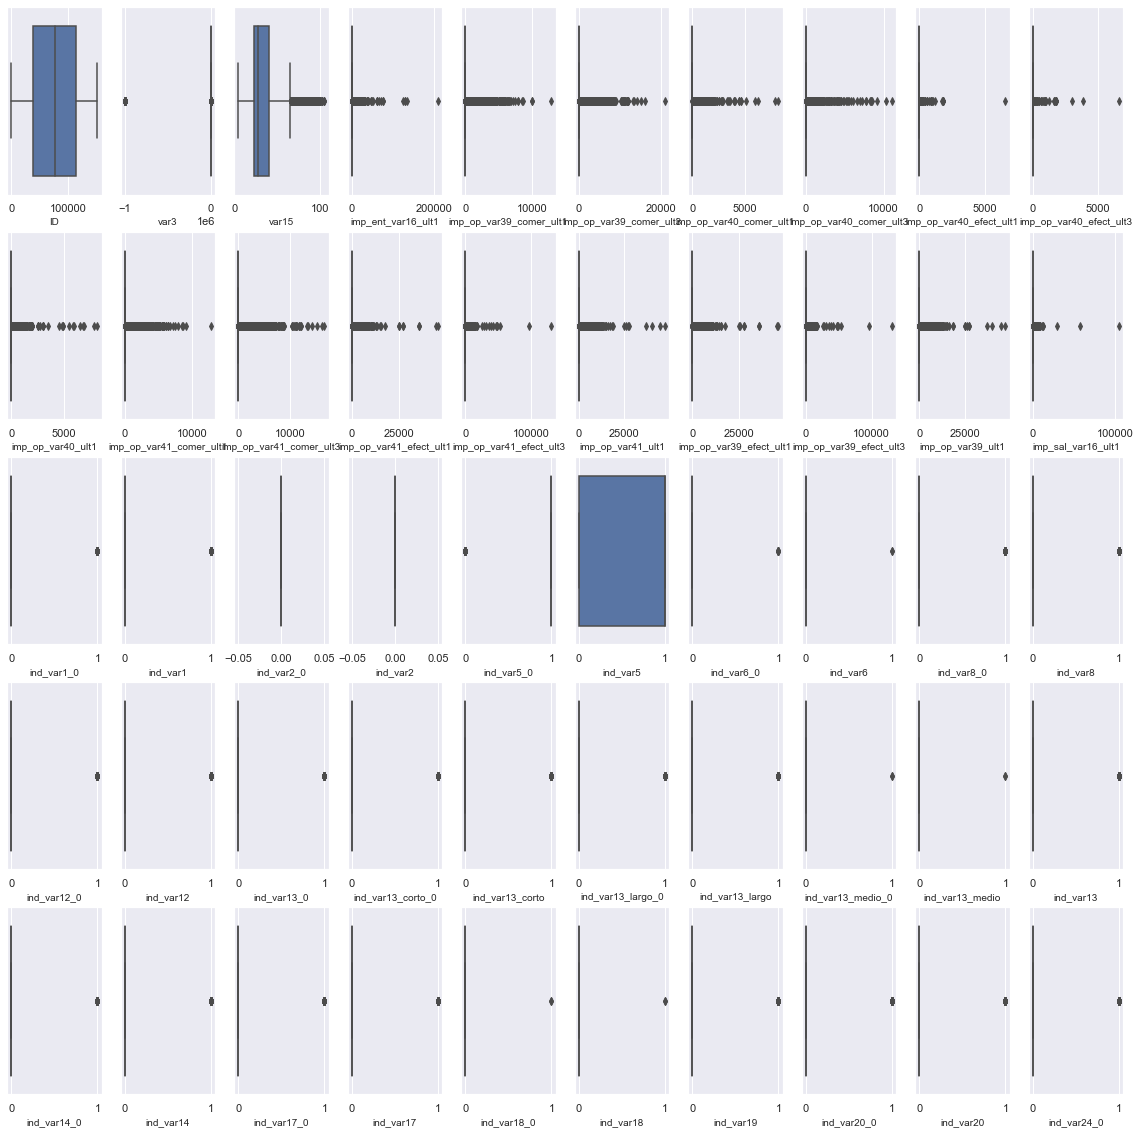

In [ ]:
# Before removing Outliers.

plt.figure(figsize = (20,20))
for i in range (50):
    plt.subplot(5, 10, i+1)
    sns.boxplot(df_train.iloc[:,i])
    plt.xlabel(df_train.columns[i], size = 10)

In [ ]:
# Checking for train data outliers at 25%,50%,75%,90%,95% and 99% quantiles
df_train.describe(percentiles=[.001, .01, .05, .25, .50, .75, .975, .99, .999])

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [ ]:
low = .01
first_quartile = 0.25
third_quartile = 0.75
high = .99

features_quant_train = df_train.quantile([low, first_quartile, third_quartile, high])
features_quant_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

We notice a lot of outliers on the training data across all quartiles.

In [ ]:
# Checking for test data outliers at 25%,50%,75%,90%,95% and 99% quantiles
df_test.describe(percentiles=[.001, .01, .05, .25, .50, .75, .975, .99, .999])

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [ ]:
low = .01
first_quartile = 0.25
third_quartile = 0.75
high = .99

features_quant_test = df_train.quantile([low, first_quartile, third_quartile, high])
features_quant_test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

Similarly we notice a lot of outliers on the test data as well.

We haven't removed all the outliers as removal of outliers costs important data loss. Hence, we have just handled extreme values.

In [ ]:
def handle_extreme_vals(data):
    df = data.copy()
    for col in df.columns:
      df[col] = df[col].replace(-999999, 0)
      df[col] = df[col].replace(9999999999, 0)

    return df

In [ ]:
df_train = handle_extreme_vals(df_train)
df_test = handle_extreme_vals(df_test)

In [ ]:
response = "TARGET"

predictors = list(df_test.columns)

### Visualizing each column

<AxesSubplot:>

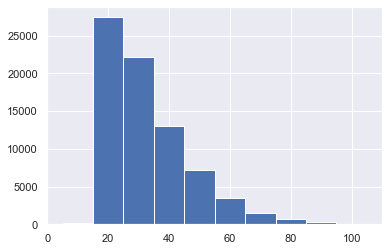

In [ ]:
df_train.var15.hist()

Var15 is distributed between 15 and 95 following a decreasing behavior. Since values are comprised of "small" numbers, they might be related to certain categorization or count, and not to to capital data. My guess is that it's related to the age of the customer, which is in consonance with values expected.

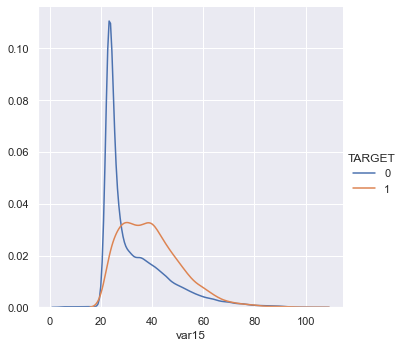

In [ ]:
sns.FacetGrid(df_train, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var15').add_legend()

In [ ]:
# 99 is seem like null values
df_train.var36.value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

We see that var 36 has integer values ranging from 0 to 3. Apart from the value 99, which we assume are nulls in the column.

<AxesSubplot:>

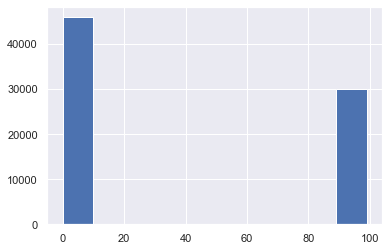

In [ ]:
df_train.var36.hist()

var36 are comprised of a small number of distinct values

For var36 the values range mainly from 0 to 3, while 99 looks like a manual flag to mark specific cases.

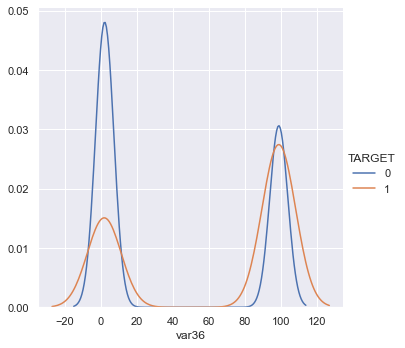

In [ ]:
# 99... half and half
sns.FacetGrid(df_train, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var36').add_legend()

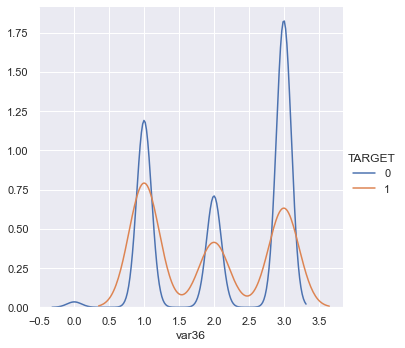

In [ ]:
temp = df_train[df_train.var36 !=99]
sns.FacetGrid(temp, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var36').add_legend()

For var36, we notice most of the target values are 0 at 3

In [ ]:
# value count for var21
df_train.var21.value_counts()

0        75152
900        236
1800       206
4500        96
3000        84
7200        62
3600        52
1500        31
6000        27
2700        26
9000        14
1200        12
5400         4
2400         3
18000        2
3300         2
4200         2
5100         2
2100         2
7500         1
10500        1
6600         1
5700         1
30000        1
Name: var21, dtype: int64

For var21, we see that the values have a broad range of values. But a large number of values are 0. Its hard to indicate what this might mean or represent.

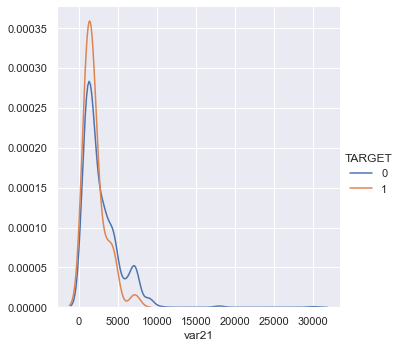

In [ ]:
# most of 3 are TARGET 0
temp = df_train[df_train.var21 !=0]
sns.FacetGrid(temp, hue= 'TARGET',height= 5).map(sns.kdeplot, 'var21').add_legend()

For var21, all values are multiples of 300, which might provide some useful information about the nature of this variable. Despite being quite noisy, the general tendency of the values' frequencies is decreasing.

In [ ]:
# most of are 0
df_train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
323572.860000        1
126512.400000        1
237928.980000        1
76654.380000         1
87671.220000         1
Name: var38, Length: 57736, dtype: int64

<AxesSubplot:>

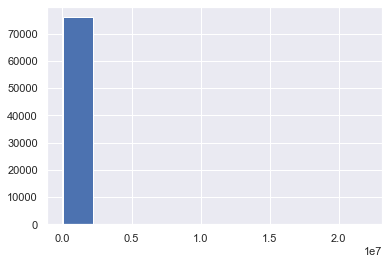

In [ ]:
#left-skewed ditribution... need to normalize
df_train.var38.hist()

<AxesSubplot:>

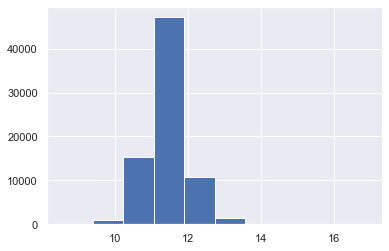

In [ ]:
# after treating skewed values the graph look better
df_train.var38 = df_train.var38.apply(lambda x : np.log(x))
df_test.var38 = df_test.var38.apply(lambda x : np.log(x))
df_train.var38.hist()

In [ ]:
#features that have only 1 unique value

var_threshold = 0
low_var_predictors = []

for col in predictors:
    if df_train[col].var() <= var_threshold:
        low_var_predictors.append(col)

print("We are considering any variable with variance 0 which essentially means that the entire column has only one unique value and hence not a random variable.\n\nNumber of predictors with zero variance =", len(low_var_predictors))

We are considering any variable with variance 0 which essentially means that the entire column has only one unique value and hence not a random variable.

Number of predictors with zero variance = 44


In [ ]:
#duplicate or identical features

df_T = df_train.T
df_T = pd.DataFrame(df_T)
duplicated_predictors = df_T.duplicated()
duplicated_predictors = list(df_train.columns[list(duplicated_predictors)])

print("Number of predictors with duplicacy =", len(duplicated_predictors))

Number of predictors with duplicacy = 68


In [ ]:
#highly correlated features

cor_threshold = 0.95
matrix = df_train.corr().abs()

selected = matrix.where(np.triu(np.ones(matrix.shape),k=1).astype(np.bool))
correlated_predictors = [i for i in selected.columns if any(selected[i] >= cor_threshold)]

print("In this case, we are checking for variables which may not be totally identical, but are still highly correlated, and can be removed to reduce the dimension of our design matrix.")
print("Number of higly correlated predictors =", len(correlated_predictors))

In this case, we are checking for variables which may not be totally identical, but are still highly correlated, and can be removed to reduce the dimension of our design matrix.
Number of higly correlated predictors = 118


In [ ]:
to_be_dropped = [
    "ID", #it is an unique value for every entry in the data
]

to_be_dropped = to_be_dropped + low_var_predictors + duplicated_predictors + correlated_predictors

final_drop = []

#dropping all columns identified above
for col in to_be_dropped:
    if (col not in final_drop) and (col != response):
        final_drop.append(col)

def dropping_cols(df, cols=final_drop):
    df = df.drop(cols, axis=1)
    return df

df_train = dropping_cols(df_train)
df_test = dropping_cols(df_test)

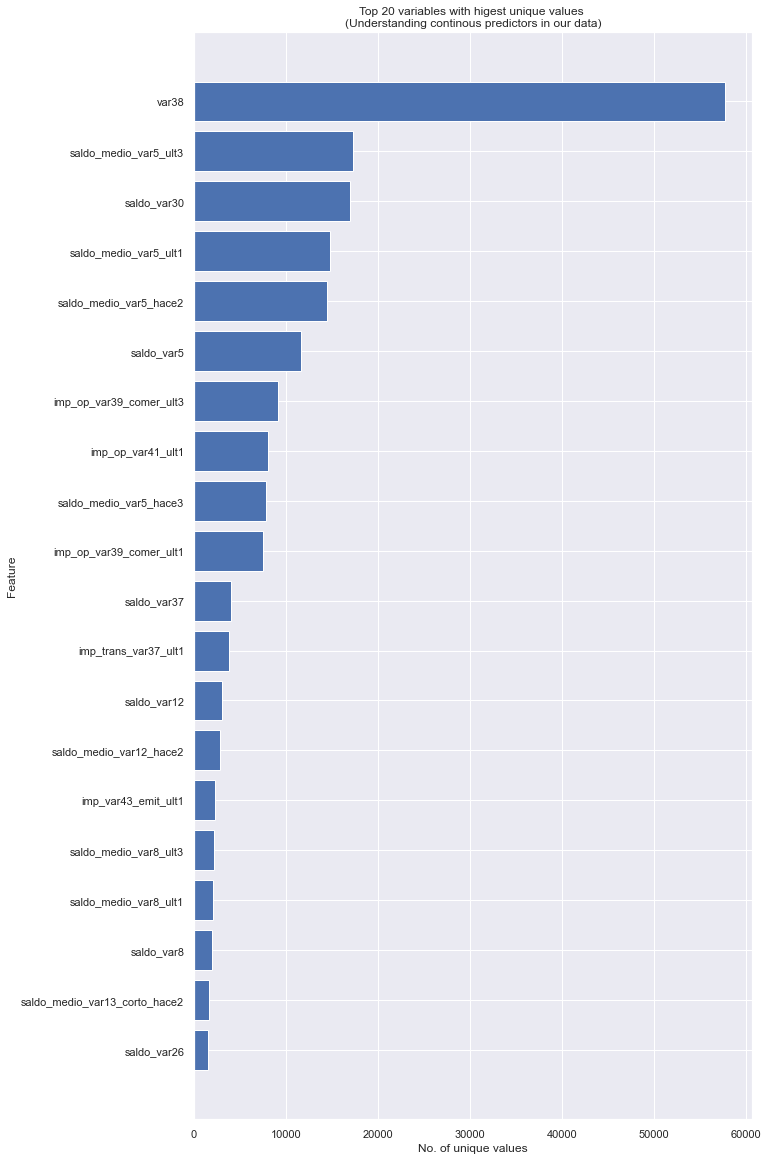

In [ ]:
#identifying columns that have the highest number of unique values to get a sense of continous variables in our data
top=20
plot_data = pd.DataFrame(df_train.nunique().sort_values(ascending=False)).reset_index().head(top)

plt.figure(figsize=(10,20))
plt.barh(plot_data['index'][::-1], plot_data[0][::-1])
plt.title(f"Top {top} variables with higest unique values \n(Understanding continous predictors in our data)")
plt.ylabel("Feature")
plt.xlabel("No. of unique values")
plt.show()

Binning or discretization is used for the transformation of a continuous or numerical variable into a categorical feature. Binning of continuous variable introduces non-linearity and tends to improve the performance of the model. It can be also used to identify missing values or outliers.

Change in Shape of data after preprocessing

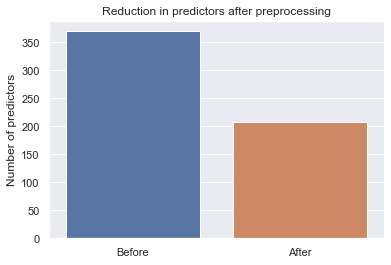

We have removed 162 features from the original data, leaving us with 208 predictors after preprocessing.


In [ ]:
ax = sns.barplot(["Before", "After"], [len(predictors), len(df_train.columns)])
ax.set(ylabel='Number of predictors', title='Reduction in predictors after preprocessing')
plt.show()
print(f'We have removed {len(predictors) - len(df_train.columns)} features from the original data, leaving us with {len(df_train.columns)} predictors after preprocessing.')

   ## EDA

In [ ]:
#checking if any categorical-like variables exist in our data
print("Count of variables with just two unique values is", len(df_train.columns[df_train.nunique() == 2]))

Count of variables with just two unique values is 56


In [ ]:
cols_2_num = len(df_train.columns[df_train.nunique() == 2])
cols_2 = df_train.columns[df_train.nunique() == 2]
x_cols2 = df_train[cols_2]

for i in x_cols2.columns:
    print(i,x_cols2[i].unique())

ind_var1_0 [0 1]
ind_var1 [0 1]
ind_var5_0 [1 0]
ind_var5 [0 1]
ind_var6_0 [0 1]
ind_var6 [0 1]
ind_var8_0 [0 1]
ind_var8 [0 1]
ind_var12_0 [0 1]
ind_var12 [0 1]
ind_var13_0 [0 1]
ind_var13_corto_0 [0 1]
ind_var13_largo_0 [0 1]
ind_var13_medio_0 [0 1]
ind_var14_0 [0 1]
ind_var14 [0 1]
ind_var17_0 [0 1]
ind_var17 [0 1]
ind_var18_0 [0 1]
ind_var19 [0 1]
ind_var20_0 [0 1]
ind_var20 [0 1]
ind_var24_0 [0 1]
ind_var24 [0 1]
ind_var25_cte [0 1]
ind_var26_0 [0 1]
ind_var30_0 [1 0]
ind_var30 [0 1]
ind_var31_0 [0 1]
ind_var31 [0 1]
ind_var32_cte [0 1]
ind_var32_0 [0 1]
ind_var33_0 [0 1]
ind_var33 [0 1]
ind_var34_0 [0 1]
ind_var37_cte [0 1]
ind_var37_0 [0 1]
ind_var39_0 [1 0]
ind_var44_0 [0 1]
ind_var44 [0 1]
delta_imp_reemb_var17_1y3 [ 0 -1]
delta_imp_trasp_var17_in_1y3 [ 0 -1]
delta_imp_trasp_var33_in_1y3 [ 0 -1]
imp_reemb_var33_ult1 [   0 1200]
imp_trasp_var33_out_ult1 [   0 3000]
ind_var7_emit_ult1 [0 1]
ind_var7_recib_ult1 [0 1]
ind_var10_ult1 [0 1]
ind_var10cte_ult1 [0 1]
ind_var43_emit_ult

In [ ]:
print("Count of variables with just three or four unique values is", len(df_train.columns[(df_train.nunique() == 3) | (df_train.nunique() == 4)]))

Count of variables with just three or four unique values is 21


In [ ]:
cols_3_num = len(df_train.columns[df_train.nunique() == 3])
cols_3 = df_train.columns[df_train.nunique() == 3]
x_cols3 = df_train[cols_3]

for i in x_cols3.columns:
    print(i,x_cols3[i].unique())

saldo_var13_medio [    0 30000  9000]
saldo_var34 [    0 36000 15000]
delta_num_aport_var33_1y3 [ 0.  -1.  -0.5]
imp_trasp_var17_in_hace3 [    0.   96781.44 45741.48]
num_aport_var33_ult1 [0 6 3]
num_meses_var29_ult3 [0 1 2]
num_trasp_var33_in_ult1 [0 3 6]
num_venta_var44_hace3 [0 3 6]


In [ ]:
cols_4_num = len(df_train.columns[df_train.nunique() == 4])
cols_4 = df_train.columns[df_train.nunique() == 4]
x_cols4 = df_train[cols_4]

for i in x_cols4.columns:
    print(i,x_cols4[i].unique())

num_var33_0 [ 0  3  6 12]
delta_imp_venta_var44_1y3 [ 0.          5.41709845 -0.50577327 -1.        ]
imp_var7_emit_ult1 [     0.   145384.92  18000.    43500.  ]
imp_venta_var44_hace3 [0.000000e+00 2.316000e+01 2.098344e+05 7.804059e+04]
num_aport_var33_hace3 [ 0  3 12  6]
num_compra_var44_hace3 [0 3 9 6]
num_meses_var5_ult3 [0 1 3 2]
num_meses_var8_ult3 [0 3 1 2]
num_meses_var13_largo_ult3 [0 3 2 1]
num_meses_var17_ult3 [0 2 1 3]
num_meses_var39_vig_ult3 [2 1 0 3]
num_meses_var44_ult3 [0 2 3 1]
saldo_medio_var29_ult1 [    0.    3365.46  2142.87 13793.67]


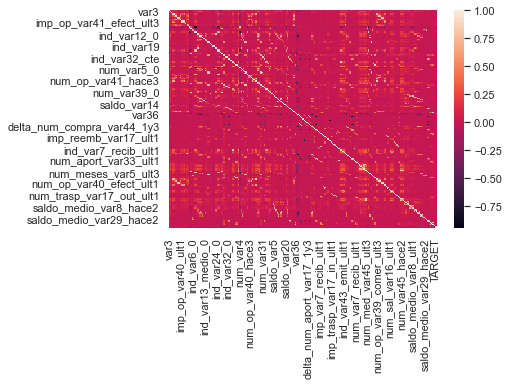

In [ ]:
#checking relation in data
sns.heatmap(df_train.corr())
plt.show()

Based on the heatmap, there does not seem to be too many correlated columns. We will have a closer look at them.

In [ ]:
correlations = df_train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,saldo_var32,saldo_var1,1.095852e-07
1,saldo_var1,saldo_var32,1.095852e-07
2,imp_trasp_var17_out_ult1,saldo_var17,1.087088e-06
3,saldo_var17,imp_trasp_var17_out_ult1,1.087088e-06
4,num_meses_var29_ult3,imp_op_var39_comer_ult1,1.215475e-06
5,imp_op_var39_comer_ult1,num_meses_var29_ult3,1.215475e-06
6,imp_ent_var16_ult1,delta_imp_compra_var44_1y3,1.269623e-06
7,delta_imp_compra_var44_1y3,imp_ent_var16_ult1,1.269623e-06
8,saldo_var13_corto,num_trasp_var33_in_ult1,1.473531e-06
9,num_trasp_var33_in_ult1,saldo_var13_corto,1.473531e-06


In [ ]:
correlations.count

<bound method DataFrame.count of                         level_0                   level_1             0
0                   saldo_var32                saldo_var1  1.095852e-07
1                    saldo_var1               saldo_var32  1.095852e-07
2      imp_trasp_var17_out_ult1               saldo_var17  1.087088e-06
3                   saldo_var17  imp_trasp_var17_out_ult1  1.087088e-06
4          num_meses_var29_ult3   imp_op_var39_comer_ult1  1.215475e-06
...                         ...                       ...           ...
43051     saldo_medio_var8_ult1     saldo_medio_var8_ult3  9.469841e-01
43052            num_var22_ult3        num_med_var22_ult3  9.484035e-01
43053        num_med_var22_ult3            num_var22_ult3  9.484035e-01
43054               ind_var44_0                 ind_var44  9.497007e-01
43055                 ind_var44               ind_var44_0  9.497007e-01

[43056 rows x 3 columns]>

In [ ]:
selected_correlations = correlations[correlations[0] > 0.5]
selected_correlations.count

<bound method DataFrame.count of                      level_0                level_1         0
42284            num_var17_0            ind_var31_0  0.500116
42285            ind_var31_0            num_var17_0  0.500116
42286   num_aport_var17_ult1              ind_var17  0.500283
42287              ind_var17   num_aport_var17_ult1  0.500283
42288  num_compra_var44_ult1              ind_var44  0.500530
...                      ...                    ...       ...
43051  saldo_medio_var8_ult1  saldo_medio_var8_ult3  0.946984
43052         num_var22_ult3     num_med_var22_ult3  0.948403
43053     num_med_var22_ult3         num_var22_ult3  0.948403
43054            ind_var44_0              ind_var44  0.949701
43055              ind_var44            ind_var44_0  0.949701

[772 rows x 3 columns]>

Out of 43056 pairs there are 772 pairs of columns showing high corelations between them.

In [ ]:
#selecting a few variables on which to run analysis

selected_variables = ["var3", "var15", "var38", 'saldo_medio_var5_ult3']

### Distribution Plots

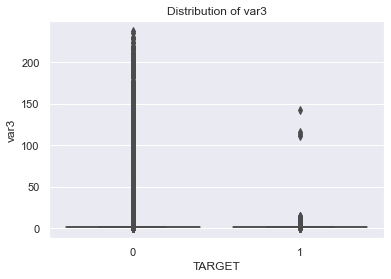

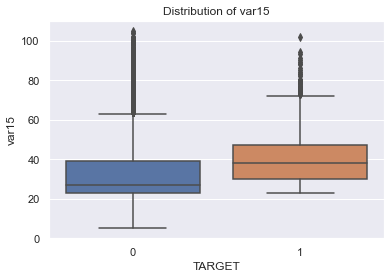

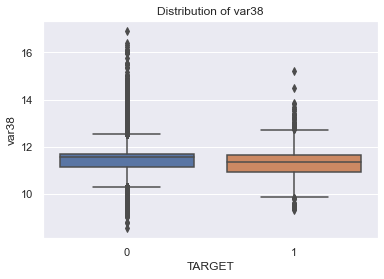

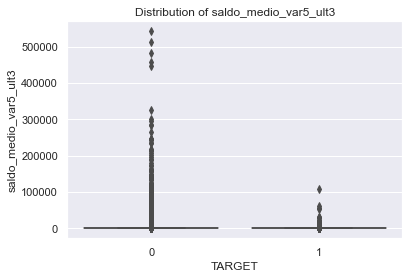

In [ ]:
for col in selected_variables:
    sns.boxplot(data=df_train, y=col, x="TARGET")
    plt.title(f"Distribution of {col}")
    plt.show()

The distribution of "var3" shows a higher concentration of outliers for cases with a target value of 0 compared to cases with a target value of 1.

The distribution of "var15" is largely similar for both target classes.

The distributions of both "var38" and "saldo_medio_var5_ult3" are primarily found in the outlier region.

### Histogram plot to check spread

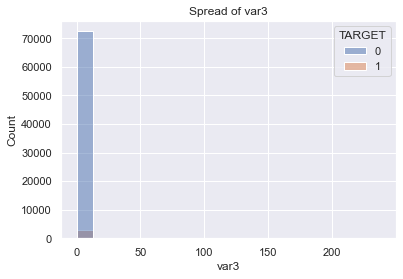

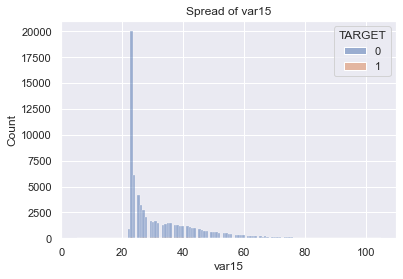

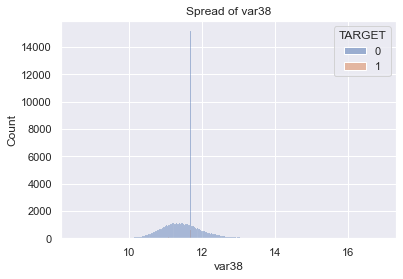

In [ ]:
for col in selected_variables[:3]:
    sns.histplot(data=df_train, x=col, hue="TARGET")
    plt.title(f"Spread of {col}")
    plt.show()

The var3 variables have a high concentration of values close to 0

Meanwhile the var15 variables have data points that are spread out over a larger range.

### Scatter Plot

To visualize the relationship between the features in the selected variables

var3 and saldo_medio_var5_ult3 are randomly distributed, so it shows a lack of dependent relationship
var38 and var15 seems to be dependent
var3 and var15 have linear relationship between them
var38 and var3 shows no relationship

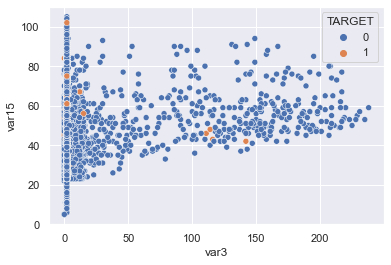

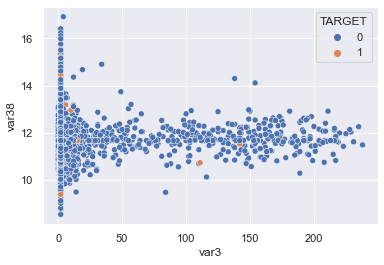

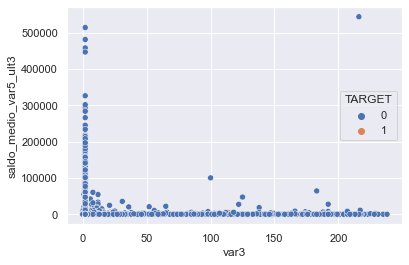

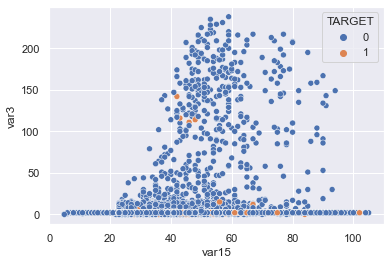

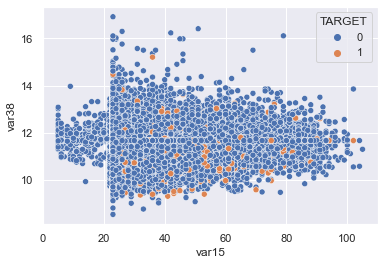

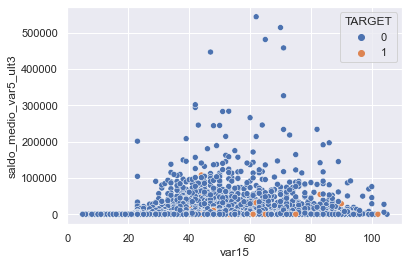

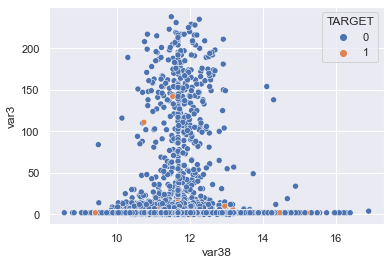

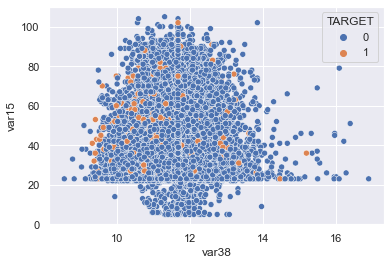

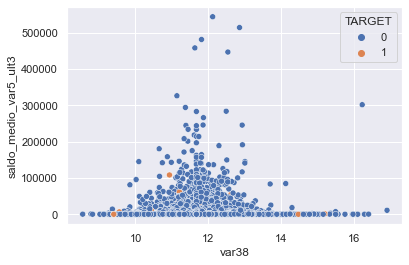

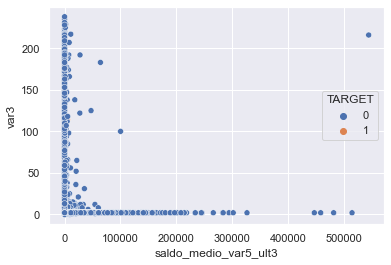

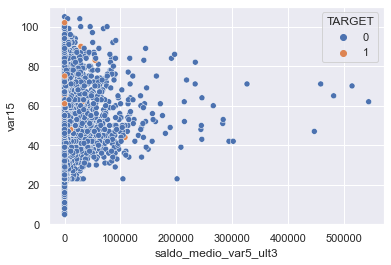

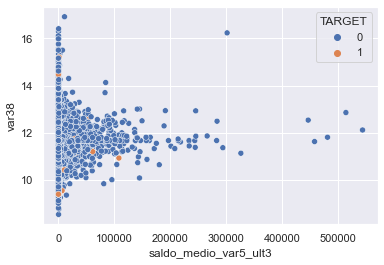

In [ ]:
for col in selected_variables:
    for second_col in selected_variables:
        if col != second_col:
            sns.scatterplot(df_train[col], df_train[second_col], hue=df_train["TARGET"])
            plt.xlabel(col)
            plt.ylabel(second_col)
            plt.show()

## Handling Imbalanced Data

Below, we are dealing with the imbalanced data. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

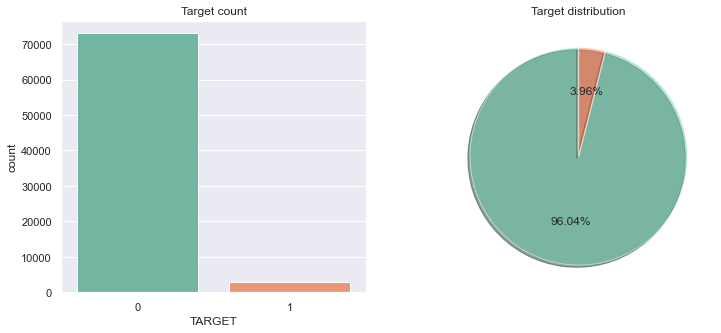

In [ ]:
#plot to visualize class imbalance

len_train = len(df_train)
target_0 = len(df_train.loc[df_train['TARGET']==0])/len_train
target_1 = 1-target_0

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# TARGET distribution count
sns.countplot(x='TARGET', ax=axes[0], data=df_train, palette='Set2')
axes[0].set_title('Target count')

# TARGET distribution pie chart
axes[1].pie([target_0, target_1], colors=['mediumaquamarine', 'coral'], autopct='%1.2f%%', shadow=True, startangle=90, wedgeprops={'alpha':.5})
axes[1].set_title('Target distribution')
plt.savefig('target_counts.png')

The training dataset indicates that 96% of the target variable values are 0, indicating that most customers are satisfied with their services. However, the data is highly imbalanced, with the majority of observations belonging to class 0 (satisfied customers). This can lead to a model that is biased towards class 0 and performs poorly on the minority class.

### Resampling with SMOTE

As the name suggests, **SMOTE**(Synthetic Minority Oversampling Technique) creates “synthetic” examples rather than over-sampling with replacement. Specifically, SMOTE works the following way. It starts by randomly selecting a minority class example and finding its k nearest minority class neighbors at random. Then a synthetic example is created at a randomly selected point in the line that connects two examples in feature space.

In this section, we will look at how we can use SMOTE as a data preparation method when evaluating our model.

In [ ]:
#resampling data using SMOTE(Synthetic Minority Oversampling Technique) technique

method = SMOTE(sampling_strategy="not majority")

x_train = df_train.drop('TARGET', axis=1)
y_train = df_train['TARGET']

x_train, y_train = method.fit_resample(x_train, y_train)

In [ ]:
x_train.shape

(102216, 39)

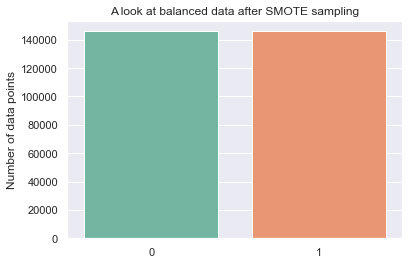

After SMOTE sampling, we now have 0.5000% rows with category label 1 in the response variable.


In [ ]:
#visualizing the effect of SMOTE resampling on data imbalance

ax = sns.barplot(["0", "1"], [len(y_train==0), len(y_train==1)], palette='Set2')
ax.set(ylabel='Number of data points', title='A look at balanced data after SMOTE sampling')
plt.show()
num_1 = len(y_train==1)
num_0 = len(y_train==0)
perc_1 = num_1/(num_1 + num_0)

print(f'After SMOTE sampling, we now have {perc_1:.4f}% rows with category label 1 in the response variable.')

We address the data imbalance issue using SMOTE sampling. It helps in reducing bias towards the majority class and improve the model's ability to classify observations from the minority class. In our dataset, we see that after processing. 50% rows have category 1 label.

In [ ]:
x_train

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_largo_0,ind_var13_medio_0,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var33_0,ind_var33,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var44_0,ind_var44,num_var4,num_var5_0,num_var12_0,num_var13_largo_0,num_var14_0,num_var17_0,num_var17,num_var26_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var33_0,num_var37_med_ult2,num_var37_0,num_var39_0,num_var42_0,num_var42,saldo_var1,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var26,saldo_var30,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var17_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_reemb_var13_ult1,num_reemb_var17_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38
0,2,23,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,3,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.

In [ ]:
#splitting data into training and val sets

x_train, x_val ,y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,random_state=10)

In [ ]:
#splitting data into training and test sets

x_df_train, x_test ,y_df_train, y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=10)

In [ ]:
x_df_train.shape, x_test.shape, y_df_train.shape, y_test.shape

((81772, 207), (20444, 207), (81772,), (20444,))

In [ ]:
df_train

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_largo_0,ind_var13_medio_0,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var33_0,ind_var33,ind_var34_0,ind_var37_cte,ind_var37_0,ind_var39_0,ind_var44_0,ind_var44,num_var4,num_var5_0,num_var12_0,num_var13_largo_0,num_var14_0,num_var17_0,num_var17,num_var26_0,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var33_0,num_var37_med_ult2,num_var37_0,num_var39_0,num_var42_0,num_var42,saldo_var1,saldo_var5,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var26,saldo_var30,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var17_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_reemb_var17_ult1,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_ult1,imp_trasp_var33_in_ult1,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var29_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var40_efect_ult1,num_op_var40_efect_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_reemb_var13_ult1,num_reemb_var17_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,3,0,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0.00,0.0,0.0,99,0

In [ ]:
x_train.shape, x_val.shape, x_df_train.shape, x_test.shape

((102216, 39), (43808, 39), (60816, 16), (15204, 16))

In [ ]:
#for the train and val set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

In [ ]:
#for the train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_df_train = sc.fit_transform(x_df_train)
x_test = sc.transform(x_test)

In [ ]:
x_df_train.shape

(81772, 39)

## PCA

Principal component analysis (PCA), a technique for reducing the dimensionality of big data sets, works by condensing a large collection of variables into a smaller set that retains the majority of the information in the larger set. The quality of a data set inherently suffers as the number of variables is reduced, but the idea in dimensionality reduction is to sacrifice a little accuracy for simplicity. Smaller data sets are simpler to examine and display, and since there are fewer unnecessary variables to handle, machine learning algorithms can analyze data much more quickly and easily.  

For each value of each variable, this may be accomplished mathematically by dividing by the standard deviation and removing the mean.

For our dataset also we have considered the same, we are performing PCA on it to reduce the dimensionality of the dataset. Using the initial we reduce the number of columns from 371 to 209 columns. After implementing PCA, which calculates the variance and builds principal components, reduced the dimensionality to 39 components.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.70)

In [ ]:
pca.fit(x_train)

PCA(n_components=0.7)

In [ ]:
pca.n_components_

39

In [ ]:
x_train=pca.transform(x_train)
x_val=pca.transform(x_val)

In [ ]:
x_train.shape

(102216, 39)

In [ ]:
x_val.shape

(43808, 39)

### PCA for test data

In [ ]:
pca_test = PCA(0.80)

In [ ]:
pca_test.fit(x_df_train)

PCA(n_components=0.8)

In [ ]:
pca_test.n_components_

52

In [ ]:
x_df_train=pca_test.transform(x_df_train)
x_test=pca_test.transform(x_test)

In [ ]:
x_df_train.shape

(81772, 52)

In [ ]:
x_test.shape

(20444, 52)

## Base Models

We have done modelling for three base models which are executed in the below cells. We have then tuned the hyperparameters for all the models and predicted the models with the best parameters as well.

## 1. Logistic Regression

In [ ]:
lg= LogisticRegression(random_state=42, max_iter=1000)
lg.fit(x_train , y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = lg.predict(x_val)#x_val

In [ ]:
lg1= LogisticRegression(random_state=42, max_iter=1000)
lg1.fit(x_df_train , y_df_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred1 = lg1.predict(x_test)

In [ ]:
roc_auc_score(y_test, y_pred1)

0.7016473320035029

In [ ]:
lg1.score(x_test, y_test)

0.7016239483467032

In [ ]:
t0=time.time()
model= LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc5 = roc_auc_score(y_val, y_pred)
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_val,y_pred,digits=5))
print(confusion_matrix(y_pred, y_val))#,cmap=plt.cm.pink
#plot_roc_curve(model, x_val, y_val)

Accuracy = 0.6972014243973703
ROC Area under Curve = 0.6971263447662615
Time taken = 0.18650031089782715
              precision    recall  f1-score   support

           0    0.70520   0.67429   0.68940     21832
           1    0.68992   0.71997   0.70462     21976

    accuracy                        0.69720     43808
   macro avg    0.69756   0.69713   0.69701     43808
weighted avg    0.69754   0.69720   0.69704     43808

[[14721  6154]
 [ 7111 15822]]


In [ ]:
from sklearn.model_selection import GridSearchCV

### Hyperparameter tuning for logistic Regression

A hyperparameter is a type of parameter, external to the model, set before the learning process begins. It’s tunable and can directly affect how well a model performs.

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).
solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

Regularization (penalty) can sometimes be helpful.
penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

The C parameter controls the penality strength, which can also be effective.
C in [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid={"C":np.logspace(-3,3,5), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000, solver='lbfgs')
logreg_cv=GridSearchCV(logreg,grid,cv=10, verbose = 4, scoring = 'accuracy', error_score="raise")
logreg_cv.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.684 total time=   0.0s
[CV 2/10] END ..............C=0.001, penalty=l2;, score=0.693 total time=   0.0s
[CV 3/10] END ..............C=0.001, penalty=l2;, score=0.696 total time=   0.0s
[CV 4/10] END ..............C=0.001, penalty=l2;, score=0.700 total time=   0.0s
[CV 5/10] END ..............C=0.001, penalty=l2;, score=0.699 total time=   0.0s
[CV 6/10] END ..............C=0.001, penalty=l2;, score=0.697 total time=   0.0s
[CV 7/10] END ..............C=0.001, penalty=l2;, score=0.693 total time=   0.0s
[CV 8/10] END ..............C=0.001, penalty=l2;, score=0.698 total time=   0.0s
[CV 9/10] END ..............C=0.001, penalty=l2;, score=0.697 total time=   0.0s
[CV 10/10] END .............C=0.001, penalty=l2;, score=0.691 total time=   0.0s
[CV 1/10] END C=0.03162277660168379, penalty=l2;, score=0.687 total time=   0.0s
[CV 2/10] END C=0.03162277660168379, penalty=l2;

GridSearchCV(cv=10, error_score='raise',
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'penalty': ['l2']},
             scoring='accuracy', verbose=4)

### Checking on best parameters

In [ ]:
logreg_cv.best_params_

{'C': 31.622776601683793, 'penalty': 'l2'}

In [ ]:
t0=time.time()
lr_best= LogisticRegression(max_iter=1000, solver='lbfgs', **logreg_cv.best_params_)#C = 0.001, penalty = 'l2'
lr_best.fit(x_train,y_train)
y_pred = lr_best.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc5 = roc_auc_score(y_val, y_pred)
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_val,y_pred,digits=5))

Accuracy = 0.6972242512783053
ROC Area under Curve = 0.6971492469282256
Time taken = 0.18548083305358887
              precision    recall  f1-score   support

           0    0.70521   0.67433   0.68943     21832
           1    0.68995   0.71997   0.70464     21976

    accuracy                        0.69722     43808
   macro avg    0.69758   0.69715   0.69703     43808
weighted avg    0.69756   0.69722   0.69706     43808



## 2. Random forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred_rfc = rfc.predict(x_val)

In [ ]:
print('Accuracy of random forest regressor on test set: {:.2f}'.format(rfc.score(x_val, y_val)))

Accuracy of random forest regressor on test set: 0.91


In [ ]:
t0=time.time()
roc_auc_rfc = roc_auc_score(y_val, y_pred_rfc)
time_taken_rfc = time.time()-t0
print("ROC Area under Curve = {}".format(roc_auc_rfc))
print("Time taken = {}".format(time_taken_rfc))

ROC Area under Curve = 0.9134153711507527
Time taken = 0.010013580322265625


### Metrics on test data for Random Forest

In [ ]:
rfc1 = RandomForestClassifier(n_jobs=-1)
rfc1.fit(x_df_train, y_df_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
test_pred_rfc = rfc1.predict(x_test)

In [ ]:
t0=time.time()
roc_auc_rfc = roc_auc_score(y_test, test_pred_rfc)
time_taken_rfc = time.time()-t0
print('Accuracy of random forest on test set: {:.2f}'.format(rfc1.score(x_test, y_test)))
print("ROC Area under Curve = {}".format(roc_auc_rfc))
print("Time taken = {}".format(time_taken_rfc))

Accuracy of random forest on test set: 0.86
ROC Area under Curve = 0.8594117439703368
Time taken = 0.003988981246948242


### Random Forest Hyperparameter Tuning

Hyperparameters for Random Forest:

1. n_estimators: number of trees
2. max_features: Tunes feature at each node randomly.
3. max_depth: To define the depth of the tree
4. criterion: To define the impurity

**Ginny Impurity and Entropy**
Entropy and ginny impurity both can be defined as a measure of the purity of the sub split.
But if we compare both the methods then Gini Impurity is more efficient than entropy in terms of computing power. As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power.

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['auto'],
    'max_depth' : [4,6,8],
    'criterion' :['gini']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 5, error_score="raise")
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.732 total time=  30.4s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.742 total time=  30.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.739 total time=  29.9s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.737 total time=  29.8s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.738 total time=  30.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.732 total time=  45.0s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.741 total time=  45.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.739 total time=  45.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.736 total time=  45.0s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=300;, score=0.737 total time=  44.9s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.756 total time=  43.5s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.764 total time=  43.3s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.763 total time=  43.5s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.759 total time=  43.5s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200;, score=0.758 total time=  43.3s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.755 total time= 1.1min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.764 total time= 1.1min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.764 total time= 1.1min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.760 total time= 1.1min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=300;, score=0.758 total time= 1.1min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.781 total time=  56.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.787 total time=  56.2s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.789 total time=  56.1s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.783 total time=  56.0s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.783 total time=  55.9s


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.782 total time= 1.4min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.788 total time= 1.4min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.789 total time= 1.4min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.783 total time= 1.4min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.783 total time= 1.4min


C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [200, 300]},
             verbose=5)

In [ ]:
y_pred_cv_rfc = CV_rfc.predict(x_val)

In [ ]:
print('Accuracy of random forest after hyperparameter tuning: {:.2f}'.format(CV_rfc.score(x_val, y_val)))

Accuracy of random forest after hyperparameter tuning: 0.86


### Best Parameters for Random Forest

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
y_pred_rfc_best = rfc_best.predict(x_val)

In [ ]:
rfc_best = RandomForestClassifier(**CV_rfc.best_params_)
rfc_best.fit(x_train, y_train)

C:\Users\adhar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=300)

In [ ]:
t0=time.time()
# model= LogisticRegression(max_iter=1000)
# model.fit(x_train,y_train)
y_pred = rfc_best.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc5 = roc_auc_score(y_val, y_pred)
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_val,y_pred,digits=5))
print(confusion_matrix(y_pred, y_val))#,cmap=plt.cm.pink

Accuracy = 0.7886230825420014
ROC Area under Curve = 0.7886259009628812
Time taken = 0.9235372543334961
              precision    recall  f1-score   support

           0    0.78703   0.78948   0.78826     21832
           1    0.79021   0.78777   0.78899     21976

    accuracy                        0.78862     43808
   macro avg    0.78862   0.78863   0.78862     43808
weighted avg    0.78863   0.78862   0.78862     43808

[[17236  4664]
 [ 4596 17312]]


In [ ]:
t0=time.time()
roc_auc_rfcbest = roc_auc_score(y_val, y_pred_rfc_best)
time_taken_rfcbest = time.time()-t0
print('Accuracy of Random Forest with best parameters: {:.2f}'.format(rfc_best.score(x_val, y_val)))
print("ROC Area under Curve = {}".format(roc_auc_rfcbest))
print("Time taken = {}".format(time_taken_rfcbest))

Accuracy of Random Forest with best parameters: 0.78
ROC Area under Curve = 0.7842892886380066
Time taken = 0.00995016098022461


## 3. XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. Three main forms of gradient boosting are supported:

**Gradient Boosting** algorithm also called gradient boosting machine including the learning rate.
**Stochastic Gradient Boosting** with sub-sampling at the row, column and column per split levels.
**Regularized Gradient Boosting** with both L1 and L2 regularization.

The two reasons to use XGBoost are also the two goals of our project:
- Execution Speed.
- Model Performance.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_pred_xgb = xgb.predict(x_val)

In [ ]:
print('Accuracy of xgboost on test set: {:.2f}'.format(xgb.score(x_val, y_val)))

Accuracy of xgboost on test set: 0.90


In [ ]:
print('ROC Area Under curve of xgboost: {:.2f}'.format(roc_auc_score(y_val, y_pred_xgb)))

ROC Area Under curve of xgboost: 0.90


### Metrics on test set for XGBoost

In [ ]:
xgb1 = XGBClassifier()
xgb1.fit(x_df_train, y_df_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
t0=time.time()
roc_auc_xgb = roc_auc_score(y_test, xgb1.predict(x_test))
time_taken_xgb = time.time()-t0
print('Accuracy of XGBoost on test set: {:.2f}'.format(xgb1.score(x_test, y_test)))
print("ROC Area under Curve = {}".format(roc_auc_xgb))
print("Time taken = {}".format(time_taken_xgb))

Accuracy of XGBoost on test set: 0.84
ROC Area under Curve = 0.8364792210120724
Time taken = 0.019945859909057617


### Hyperparameter tuning for XGBoost

Hyperparameters for XGBoost:

1. max_depth: defines the depth of the tree and it is used to control overfitting as higher depth allows model to learn relation.
2. reg_alpha: (analogous to Lasso regression) It can be used in case of very high dimensionality so that the algorithm runs faster when implemented.
3. learning rate:The learning rate determines the step size at each iteration while your model optimizes toward its objective.
4. colsample_bytree: This is a family of parameters for subsampling of columns.
5. booster: it helps select model to run at each iteration like gbtree and dart - whiuch is use for tree based models, and gbliner uses linear models.
6. gamma: Gamma specifies the minimum loss reduction required to make a split
7. min_child_weight: It defines the minimum sum of weights of all observations required in a child.
8. n_estimators: The number of trees in our ensemble. Equivalent to the number of boosting rounds.
9. reg_lambda: (analogous to Ridge regression) This is used to handle the regularization part of XGBoost

**Lasso**: it is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
**Ridge**: Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

In [ ]:
param = {
        'max_depth': [5, 18, 1],
        'reg_alpha': [40, 180, 1],
        'learning_rate':[0.1, 1],
        'colsample_bytree': [0.3, 1],
        'booster': ['gbtree'],
        'gamma':[1,9],
        'min_child_weight': [0,10,1],
        'n_estimators': [180],
        'reg_lambda': [0, 1]
        }

In [ ]:
from xgboost import cv

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param, cv= 5, n_jobs=4, verbose = 5, scoring='roc_auc', error_score="raise")
CV_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learn...
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             n_jobs=4,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.3, 1],
                         'gamma': [1, 9], 'learning_rate': [0.1, 1],
                         'max_depth': [5, 18, 1],
                         'min_child_weight': [0, 10, 1], 'n_estimators': [180],
                         'reg_alpha': [40, 180, 1], 'reg_lambda': [0, 1]},
             scoring='roc_auc', verbose=5)

In [ ]:
CV_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 18,
 'min_child_weight': 1,
 'n_estimators': 180,
 'reg_alpha': 1,
 'reg_lambda': 0}

In [ ]:
xgb_best = XGBClassifier(**CV_xgb.best_params_)
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
y_pred_xgbest = xgb_best.predict(x_val)

In [ ]:
t0=time.time()
# model= LogisticRegression(max_iter=1000)
# model.fit(x_train,y_train)
y_pred = xgb_best.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc5 = roc_auc_score(y_val, y_pred)
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_val,y_pred,digits=5))
print(confusion_matrix(y_pred, y_val))#,cmap=plt.cm.pink

Accuracy = 0.8778990138787436
ROC Area under Curve = 0.8778195837879306
Time taken = 0.09075665473937988
              precision    recall  f1-score   support

           0    0.89640   0.85366   0.87450     21832
           1    0.86119   0.90198   0.88111     21976

    accuracy                        0.87790     43808
   macro avg    0.87879   0.87782   0.87781     43808
weighted avg    0.87874   0.87790   0.87782     43808

[[18637  2154]
 [ 3195 19822]]


In [ ]:
print('Accuracy: {:.2f}'.format(xgb_best.score(x_val, y_val)))

Accuracy: 0.88


In [ ]:
print('ROC Area Under curve: {:.2f}'.format(roc_auc_score(y_val, y_pred_xgbest)))

ROC Area Under curve: 0.88


In [ ]:
y_pred_cv_xgb = CV_xgb.predict(x_val)

In [ ]:
print('Accuracy: {:.2f}'.format(CV_xgb.score(x_val, y_val)))

Accuracy: 0.95


In [ ]:
print('ROC Area Under curve: {:.2f}'.format(roc_auc_score(y_val, y_pred_cv_xgb)))

ROC Area Under curve: 0.87


## Ensemble Modeling

Ensemble modeling is the process of running two or more related but different analytical models and then synthesizing the results into a single score or spread in order to improve the accuracy of predictive analytics.

In our approach we have stacked logestic regression, random forest classifier and XGBoost as base models in the ensemble model.

**STACKING:**  Stacking is a technique in which a new model is created to make predictions based on the predictions of multiple other models. The new model is trained to combine the predictions of the individual models in a way that enhances the overall performance of the ensemble. This is often done by using the predictions of the individual models and the true labels for the training data to train the new model. Stacking is often used to improve the performance of the ensemble by allowing the new model to learn how to effectively combine the predictions of the individual models, especially when the models in the ensemble are different or have been trained on different data.

**The diagram below depicts how stacking is implemented**



In [ ]:
#for lr_best,rfc_best, xgb_best models
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier

In [ ]:
def create_stacking_models():
    base_models = list()
    base_models.append(('RF', rfc_best)
                       )
    base_models.append(('XGB', xgb_best)
                       )
    base_models.append(('LogisticRegression', lr_best)
                       )
    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

In [ ]:
def models_all():
    all_models = dict()
    all_models['RF']= rfc_best
    all_models['XGB']= xgb_best
    all_models['LogisticRegression'] = lr_best
    all_models['Stacking'] = create_stacking_models()
    return all_models

In [ ]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, x_train, y_train, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [ ]:
model_results = list()
models = models_all()
names = list()

# Create a for loop that iterates over each name, model in models dictionary
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
#     print(model_results)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores)))


>RF 0.781
>XGB 0.886
>LogisticRegression 0.697
>Stacking 0.957


In [ ]:
t0=time.time()
# model= LogisticRegression(max_iter=1000)
# model.fit(x_train,y_train)
y_pred = final_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
roc_auc5 = roc_auc_score(y_val, y_pred)
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.91      0.91      0.91        11

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



### Conclusion

* We implemented stacking instead of boosting as Boosting involves sequentially trained weak learners.
* As  Variance keeps decreasing and causes overfitting in Boosting, hence moved ahead with stacking instead of boosting and bagging.
* logistic regression is used as Base model along with Random Forest and xGBoost. logistic regression is also used as Meta Classifier model.
* Due to PCA, The quality of a data set inherently suffers as the number of variables is reduced, but the idea in dimensionality reduction is to sacrifice a little accuracy for simplicity and interpretability. Hence, reducing the dimensions from 317 to 39 principal components.
**STACKING:**  Stacking is a technique in which a new model is created to make predictions based on the predictions of multiple other models. The new model is trained to combine the predictions of the individual models in a way that enhances the overall performance of the ensemble. This is often done by using the predictions of the individual models and the true labels for the training data to train the new model. Stacking is often used to improve the performance of the ensemble by allowing the new model to learn how to effectively combine the predictions of the individual models, especially when the models in the ensemble are different or have been trained on different data.

* optimal results-> 89% accuracy is achieved using stacking.




**REFERENCES**

1. Used for cross validation. [Reference for grid Search](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)
2. Used for Hyperparameter tuning.  [references for hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.htmlhttps://www.kaggle.com/code/emanueleamcappella/random-forest-hyperparameters-tuning)
3. [Reference for Ensemble ](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

4. [Reference for PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

5. [Reference for PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
6. https://www.nature.com/articles/s41598-021-03430-5/

7. [Reference for Stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)


## COPYRIGHT

Copyright 2022 Shivani Shekhawat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the \"Software\"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED \"AS IS\", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.